### 1.文件预处理

In [25]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import skimage.transform as sktr
import skimage.color as color
import skimage.io as skio
import scipy.misc
import scipy
from scipy import signal, sparse
import skimage as sk
import skimage.filters as sf
from skimage.io import imsave, imshow, show
from skimage.color import grey2rgb

from align_image_code import align_images,get_points
from operations import hybridImageOp, pyramidsOp, PyramidMode,hybridImageFn
from utils import *
import cv2

from pathlib import Path
PhotoPath = Path("images")

plt.rcParams['image.cmap'] = 'gray'
%pylab inline

Populating the interactive namespace from numpy and matplotlib


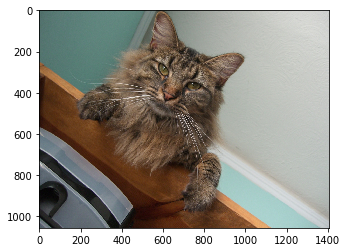

In [2]:
# First load images
# high sf
imhigh = plt.imread(PhotoPath/'DerekPicture.jpg')/255.
# low sf
imlow = plt.imread(PhotoPath/'nutmeg.jpg')/255

img1 = imhigh*255
img2 = imlow*255
#imlow = imlow[0:900,150:1000]
plt.imshow(imlow)

In [3]:
## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies
sigma1 = 20
sigma2 = 21

### 3.图像融合
####  opencv实现

In [4]:
def hybridImageOp(im1, im2, sigma1, sigma2, alignPts=None):
    if alignPts == None:
        im1_aligned, im2_aligned = align_images(im1, im2)
    else:
        im1_aligned, im2_aligned = align_images_w_pts(im1, im2, alignPts)

    hybrid = hybridImageFn(im1_aligned, im2_aligned, sigma1, sigma2)
    return hybrid


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


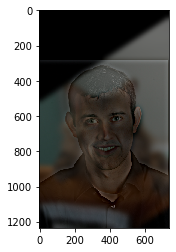

In [18]:
# 猫&&人融合
alignPts1 = ((597.7857142857143, 286.3571428571428), (752.0714285714287, 372.07142857142844), (293.46536796536805, 338.61688311688295), (443.07575757575773, 327.53463203463184))
# ((297.82954545454527, 619.0048701298701), (448.1948051948052, 605.6390692640692), (297.82954545454527, 632.370670995671), (441.5119047619048, 608.9805194805195))#((299.0064935064936, 348.3138528138527), (443.07575757575773, 333.0757575757574), (606.3571428571429, 289.21428571428555), (754.9285714285716, 369.21428571428555))
result = hybridImageOp(imlow, imhigh, 21, 20, alignPts=alignPts1)
plt.imshow(result,'gray')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


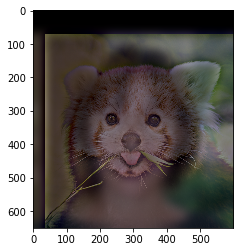

In [23]:
# women和redpanda融合
alignPts2 = ((375.241935483871, 253.22903225806454), (505.3064516129032, 253.22903225806454), (219.22510822510822, 278.98051948051943), (362.9480519480519, 280.7121212121212))
imhigh = plt.imread('./images/redpanda.jpg')/255
imlow = plt.imread('./images/woman.jpg')/255
result = hybridImageOp(imlow, imhigh, 21, 20, alignPts=alignPts2)
plt.imshow(result,'gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


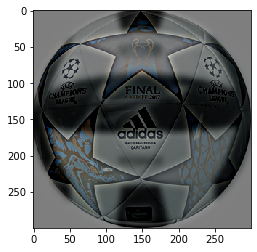

In [37]:
# soccer和volleyball融合
alignPts2 = ((375.241935483871, 253.22903225806454), (505.3064516129032, 253.22903225806454), (219.22510822510822, 278.98051948051943), (362.9480519480519, 280.7121212121212))

imhigh = plt.imread('./images/soccer_s.jpg')/255
imlow = plt.imread('./images/volleyball_s.jpg')/255
result = hybridImageFn(imlow, imhigh, 6, 7)
plt.imshow(result,'gray')

## opencv实现

In [30]:
import cv2
###第一种方法2D滤波
kernel=np.ones((3,6),np.float32)/25
#dst=cv2.filter2D(img1,-1,kernel)
###第二种方法,归一化卷积框
#dst=cv2.blur(img1,(5,5))
###第三种方法， 高斯模糊
#dst=cv2.GaussianBlur(img1,(5,5),0)
###第四种方法，中值模糊
#dst=cv2.medianBlur(img1,5)
###第5种方法，双边滤波
dst2 = cv2.filter2D(im2_aligned,-1,kernel)
dst2_low = im2_aligned - dst2
#plt.imshow(dst2_low)

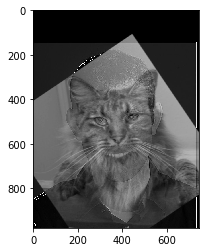

In [31]:
dst1_heigh = cv2.filter2D(im1_aligned,-1,kernel)
plt.imshow(dst1_heigh+dst2_low)